In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier

In [3]:
train=pd.read_csv('titanic/train.csv')
test=pd.read_csv('titanic/test.csv')

In [4]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
trainLen=len(train)
testCopy=test.copy() #copy함수 이용하면 원본 유지한채로 사본작업가능

In [8]:
train.info() #결측값 갯수 확인

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [10]:
total=train.append(test) # 트레인과 테스트 데이터 합쳐줌
total

C:\Users\user\AppData\Local\Temp\ipykernel_7852\1460014316.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  total=train.append(test)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [11]:
total.isnull().sum()

PassengerId       0
Survived        418
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [14]:
total[total.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,NaN,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [20]:
total[(total.Pclass==3)&(total.Embarked=='S')]['Fare'].median() #8.05
total['Fare'].fillna(total[(total.Pclass==3)&(total.Embarked=='S')]['Fare'].median(), inplace=True)

In [21]:
total[total.Fare.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


In [26]:
total['Title']=total['Name'].str.extract('([A-Za-z]+)\.', expand=True)

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17]),
 [Text(0, 0, 'Mr'),
  Text(1, 0, 'Mrs'),
  Text(2, 0, 'Miss'),
  Text(3, 0, 'Master'),
  Text(4, 0, 'Don'),
  Text(5, 0, 'Rev'),
  Text(6, 0, 'Dr'),
  Text(7, 0, 'Mme'),
  Text(8, 0, 'Ms'),
  Text(9, 0, 'Major'),
  Text(10, 0, 'Lady'),
  Text(11, 0, 'Sir'),
  Text(12, 0, 'Mlle'),
  Text(13, 0, 'Col'),
  Text(14, 0, 'Capt'),
  Text(15, 0, 'Countess'),
  Text(16, 0, 'Jonkheer'),
  Text(17, 0, 'Dona')])

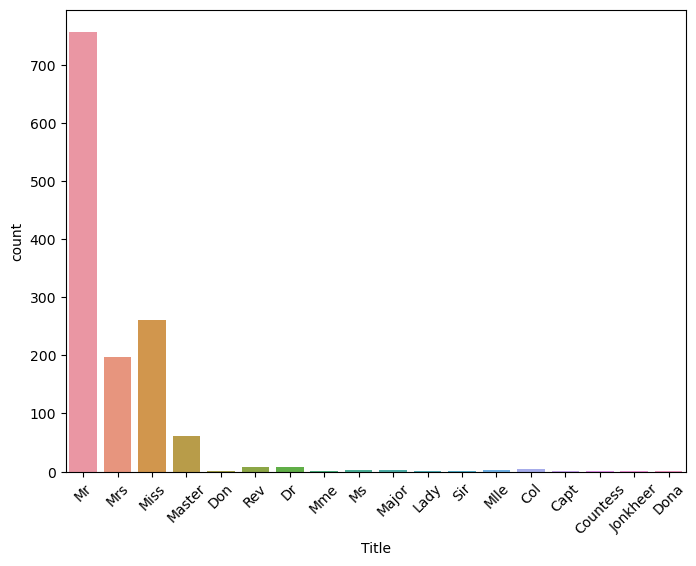

In [31]:
total
plt.figure(figsize=(8,6))
sns.countplot(x='Title', data=total)
plt.xticks(rotation=45)

In [32]:
mapping = {'Mlle': 'Miss', 'Major': 'Mr', 'Col': 'Mr', 'Sir': 'Mr', 'Don': 'Mr', 'Mme': 'Miss',
          'Jonkheer': 'Mr', 'Lady': 'Mrs', 'Capt': 'Mr', 'Countess': 'Mrs', 'Ms': 'Miss', 'Dona': 'Mrs'}

In [34]:
total.replace({'Title':mapping}, inplace=True)

In [36]:
total['Title'].value_counts()

Mr        767
Miss      265
Mrs       200
Master     61
Rev         8
Dr          8
Name: Title, dtype: int64

In [37]:
total['Title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr'], dtype=object)

In [38]:
total['Title'].nunique()

6

In [40]:
for title in total['Title'].unique():
    print(title)

Mr
Mrs
Miss
Master
Rev
Dr


In [41]:
for title in list(total['Title'].unique()):
    print(title)

Mr
Mrs
Miss
Master
Rev
Dr


In [45]:
total.groupby(['Title'])['Age'].median()

Title
Dr        49.0
Master     4.0
Miss      22.0
Mr        30.0
Mrs       36.0
Rev       41.5
Name: Age, dtype: float64

In [42]:
total['Age'].isnull().sum()

263

In [44]:
total.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
413,1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,Mr
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mrs
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr
416,1308,NaN,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,Mr
417,1309,NaN,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C,Master


In [46]:
titles=list(total.Title.unique())
titles

['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr']

In [48]:
total.groupby('Title')['Age'].median() #데이터가 시리즈형태 for문넣어서..

Title
Dr        49.0
Master     4.0
Miss      22.0
Mr        30.0
Mrs       36.0
Rev       41.5
Name: Age, dtype: float64

In [50]:
for title in titles:
    age=total.groupby('Title')['Age'].median().loc[title] #각 호칭별 나이의 중위수가 age변수에 담긴다
    total.loc[(total.Age.isnull()) & (total.Title == title), 'Age']=age
    #각 호칭별 나이의 중위수로 각 호칭별 나이의 결측값을 대체

In [51]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
dtypes: float64(3), int64(4), object(6)
memory usage: 143.2+ KB


In [54]:
total['Family_Size']=total['Parch']+total['SibSp'] 
#부모와 자식에대한 정보가 담긴 열과 형제자매에 대한 정보가 담긴 열

In [55]:
total['Family_Size'].value_counts()

0     790
1     235
2     159
3      43
5      25
4      22
6      16
10     11
7       8
Name: Family_Size, dtype: int64

In [56]:
total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0


In [57]:
total.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size
413,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S,Mr,0
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mrs,0
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0
416,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,S,Mr,0
417,1309,NaN,3,"Peter, Master. Michael J",male,4.0,1,1,2668,22.3583,NaN,C,Master,2


In [58]:
total['Last_Name']=total['Name'].apply(lambda x:str.split(x, ",")[0])

In [59]:
total

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Last_Name
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,Braund
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,Cumings
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,Heikkinen
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,Futrelle
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,Allen
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,NaN,3,"Spector, Mr. Woolf",male,30.0,0,0,A.5. 3236,8.0500,NaN,S,Mr,0,Spector
414,1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,Mrs,0,Oliva y Ocana
415,1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,Mr,0,Saether
416,1308,NaN,3,"Ware, Mr. Frederick",male,30.0,0,0,359309,8.0500,NaN,S,Mr,0,Ware


In [60]:
#total['Last_Name'].value_counts()

Andersson    11
Sage         11
Goodwin       8
Asplund       8
Davies        7
             ..
Milling       1
Maisner       1
Goncalves     1
Campbell      1
Saether       1
Name: Last_Name, Length: 875, dtype: int64

In [61]:
total.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  1309 non-null   int64  
 1   Survived     891 non-null    float64
 2   Pclass       1309 non-null   int64  
 3   Name         1309 non-null   object 
 4   Sex          1309 non-null   object 
 5   Age          1309 non-null   float64
 6   SibSp        1309 non-null   int64  
 7   Parch        1309 non-null   int64  
 8   Ticket       1309 non-null   object 
 9   Fare         1309 non-null   float64
 10  Cabin        295 non-null    object 
 11  Embarked     1307 non-null   object 
 12  Title        1309 non-null   object 
 13  Family_Size  1309 non-null   int64  
 14  Last_Name    1309 non-null   object 
dtypes: float64(3), int64(5), object(7)
memory usage: 163.6+ KB


In [63]:
dsr=0.5 #기본 생존율

In [64]:
total['Family_Survival']=dsr

In [65]:
total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Last_Name,Family_Survival
0,1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,Braund,0.5
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,Cumings,0.5
2,3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,Heikkinen,0.5
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,Mrs,1,Futrelle,0.5
4,5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,Mr,0,Allen,0.5


In [70]:
len(total.groupby('Last_Name').groups) #875개 그룹
len(total.groupby(['Last_Name', 'Fare']).groups) #982개 그룹
total.groupby(['Last_Name', 'Fare']).groups #성이 같으면서 운임이 동일한 그룹 생성 => 가족으로 간주

{('Abbing', 7.55): [845], ('Abbott', 20.25): [279, 746, 392], ('Abelseth', 7.65): [57, 345], ('Abelson', 24.0): [308, 874], ('Abrahamsson', 7.925): [251], ('Abrahim', 7.2292): [8], ('Adahl', 7.25): [365], ('Adams', 8.05): [401], ('Ahlin', 9.475): [40], ('Aks', 9.35): [855, 307], ('Albimona', 18.7875): [207], ('Aldworth', 13.0): [78], ('Alexander', 7.8875): [810], ('Alhomaki', 7.925): [840], ('Ali', 7.05): [210, 784], ('Allen', 8.05): [4], ('Allen', 211.3375): [730], ('Allison', 151.55): [297, 305, 498, 306], ('Allum', 8.3): [834], ('Andersen', 22.525): [210], ('Andersen-Jensen', 7.8542): [192], ('Anderson', 26.55): [460], ('Andersson', 7.775): [214, 320], ('Andersson', 7.7958): [146], ('Andersson', 7.925): [68], ('Andersson', 31.275): [13, 119, 541, 542, 610, 813, 850], ('Andreasson', 7.8542): [91], ('Andrew', 10.5): [204], ('Andrew', 11.5): [144], ('Andrews', 0.0): [806], ('Andrews', 77.9583): [275], ('Angheloff', 7.8958): [295], ('Angle', 26.0): [518, 190], ('Appleton', 51.4792): [57

In [71]:
total.groupby(['Last_Name', 'Fare'])

In [74]:
for grp, grpdf in total.groupby(['Last_Name', 'Fare']):
    print(grp)
    print("="*50)
    print(grpdf)
    print("="*50)

('Abbing', 7.55)
     PassengerId  Survived  Pclass                 Name   Sex   Age  SibSp  \
845          846       0.0       3  Abbing, Mr. Anthony  male  42.0      0   

     Parch     Ticket  Fare Cabin Embarked Title  Family_Size Last_Name  \
845      0  C.A. 5547  7.55   NaN        S    Mr            0    Abbing   

     Family_Survival  
845              0.5  
('Abbott', 20.25)
     PassengerId  Survived  Pclass                              Name     Sex  \
279          280       1.0       3  Abbott, Mrs. Stanton (Rosa Hunt)  female   
746          747       0.0       3       Abbott, Mr. Rossmore Edward    male   
392         1284       NaN       3     Abbott, Master. Eugene Joseph    male   

      Age  SibSp  Parch     Ticket   Fare Cabin Embarked   Title  Family_Size  \
279  35.0      1      1  C.A. 2673  20.25   NaN        S     Mrs            2   
746  16.0      1      1  C.A. 2673  20.25   NaN        S      Mr            2   
392  13.0      0      2  C.A. 2673  20.25   NaN

In [80]:
for grp, grp_df in total[['Survived','Name', 'Last_Name', 'Fare', 'Ticket', 'PassengerId', 'SibSp', 'Parch', 'Age','Cabin']].groupby(['Last_Name', 'Fare']):
    if(len(grp_df)!=1): #함께 승선한 가족이 있다면
        for ind, row in grp_df.iterrows():
            smax=grp_df.drop(ind)['Survived'].max()
            smin=grp_df.drop(ind)['Survived'].min()
            passID=row['PassengerId']
            if(smax==1.0): #나를 제외한 나머지 가족 구성원 중에 생존자가 있다면'Family_Survival'을 1로 설정
                total.loc[total['PassengerId']==passID, 'Family_Survival'] = 1
            elif(smin==0.0):
                total.loc[total['PassengerId']==passID, 'Family_Survival'] = 0
        
        

In [82]:
total.loc[total['Family_Survival']!=0.5].shape #420건, 가족의 생사여부가 확인된 승객의 수가 420명

(420, 16)

In [83]:
# for grp, grp_df in total.groupby(['Ticket']):
#     if(len(grp_df)!=1): #함께 승선한 가족, 친인척 등 주변인이 있다면
#         for ind, row in grp_df.iterrows():
#             smax=grp_df.drop(ind)['Survived'].max()
#             smin=grp_df.drop(ind)['Survived'].min()
#             passID=row['PassengerId']
#             if(smax==1.0): #나를 제외한 나머지 가족 구성원 중에 생존자가 있다면'Family_Survival'을 1로 설정
#                 total.loc[total['PassengerId']==passID, 'Family_Survival'] = 1
#             elif(smin==0.0):
#                 total.loc[total['PassengerId']==passID, 'Family_Survival'] = 0

C:\Users\user\AppData\Local\Temp\ipykernel_7852\3248268389.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for grp, grp_df in total.groupby(['Ticket']):


In [76]:
dict_1 = {
    'col1': [4, 1, 5, 3, 2],
    'col2': [6, 7, 8, 9, 10],
    'col3': [11, 12, 13, 14, 15],
    'col4': [16, 17, 18, 19, 20]
}

df_1 = pd.DataFrame(dict_1)
print(df_1)

print(df_1.iterrows()) 
#iterrows함수는 데이터 프레임에서 적용가능, 각각의 행에대한 정보를 담고있는 객체

   col1  col2  col3  col4
0     4     6    11    16
1     1     7    12    17
2     5     8    13    18
3     3     9    14    19
4     2    10    15    20
<generator object DataFrame.iterrows at 0x0000020820074BF0>


In [79]:
for i, r in df_1.iterrows():
    print(i)
    print("-"*50)
    print(r)

0
--------------------------------------------------
col1     4
col2     6
col3    11
col4    16
Name: 0, dtype: int64
1
--------------------------------------------------
col1     1
col2     7
col3    12
col4    17
Name: 1, dtype: int64
2
--------------------------------------------------
col1     5
col2     8
col3    13
col4    18
Name: 2, dtype: int64
3
--------------------------------------------------
col1     3
col2     9
col3    14
col4    19
Name: 3, dtype: int64
4
--------------------------------------------------
col1     2
col2    10
col3    15
col4    20
Name: 4, dtype: int64


In [84]:
for grp, grp_df in total.groupby(['Ticket']):
    if(len(grp_df)!=1): #함께 승선한 가족, 친인척 등 주변인이 있다면
        for ind, row in grp_df.iterrows():
            smax=grp_df.drop(ind)['Survived'].max()
            smin=grp_df.drop(ind)['Survived'].min()
            passID=row['PassengerId']
            if(smax==1.0): #나를 제외한 나머지 가족 구성원 중에 생존자가 있다면'Family_Survival'을 1로 설정
                total.loc[total['PassengerId']==passID, 'Family_Survival'] = 1
            elif(smin==0.0):
                total.loc[total['PassengerId']==passID, 'Family_Survival'] = 0

C:\Users\user\AppData\Local\Temp\ipykernel_7852\3248268389.py:1: FutureWarning: In a future version of pandas, a length 1 tuple will be returned when iterating over a groupby with a grouper equal to a list of length 1. Don't supply a list with a single grouper to avoid this warning.
  for grp, grp_df in total.groupby(['Ticket']):


In [85]:
total.loc[total['Family_Survival']!=0.5].shape

(546, 16)

In [86]:
pd.qcut(total['Fare'], 5) # qcut은 동일한 개수로 나누고싶을때,5개씩 나눴다

0        (-0.001, 7.854]
1      (41.579, 512.329]
2          (7.854, 10.5]
3      (41.579, 512.329]
4          (7.854, 10.5]
             ...        
413        (7.854, 10.5]
414    (41.579, 512.329]
415      (-0.001, 7.854]
416        (7.854, 10.5]
417     (21.558, 41.579]
Name: Fare, Length: 1309, dtype: category
Categories (5, interval[float64, right]): [(-0.001, 7.854] < (7.854, 10.5] < (10.5, 21.558] < (21.558, 41.579] < (41.579, 512.329]]

In [87]:
pd.qcut(total['Fare'], 5).value_counts()

(-0.001, 7.854]      275
(21.558, 41.579]     265
(41.579, 512.329]    259
(7.854, 10.5]        255
(10.5, 21.558]       255
Name: Fare, dtype: int64

In [92]:
total['Fare_Bin']=pd.qcut(total['Fare'], 5, labels=False)
total['Age_Bin']=pd.qcut(total['Age'], 4, labels=False)

In [94]:
total.head()
total.Sex.replace({'male':0, 'female':1}, inplace=True)

In [95]:
total.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,Family_Size,Last_Name,Family_Survival,Fare_Bin,Age_Bin
0,1,0.0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,NaN,S,Mr,1,Braund,0.5,0,0
1,2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C85,C,Mrs,1,Cumings,0.5,4,3
2,3,1.0,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,Miss,0,Heikkinen,0.5,1,1
3,4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,C123,S,Mrs,1,Futrelle,0.0,4,2
4,5,0.0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,NaN,S,Mr,0,Allen,0.5,1,2


In [96]:
total.head()
total=total[['Survived','Pclass','Sex','Age_Bin', 'Family_Size','Family_Survival','Fare_Bin']]
total

,Survived,Pclass,Sex,Age_Bin,Family_Size,Family_Survival,Fare_Bin
0,0.0,3,0,0,1,0.5,0
1,1.0,1,1,3,1,0.5,4
2,1.0,3,1,1,0,0.5,1
3,1.0,1,1,2,1,0.0,4
4,0.0,3,0,2,0,0.5,1
...,...,...,...,...,...,...,...
413,NaN,3,0,1,0,0.5,1
414,NaN,1,1,3,0,1.0,4
415,NaN,3,0,3,0,0.5,0
416,NaN,3,0,1,0,0.5,1


In [102]:
trainLen
train=total[:trainLen]
xtrain=train.drop(columns=['Survived'])

In [103]:
xtrain

,Pclass,Sex,Age_Bin,Family_Size,Family_Survival,Fare_Bin
0,3,0,0,1,0.5,0
1,1,1,3,1,0.5,4
2,3,1,1,0,0.5,1
3,1,1,2,1,0.0,4
4,3,0,2,0,0.5,1
...,...,...,...,...,...,...
886,2,0,1,0,0.5,2
887,1,1,0,0,0.5,3
888,3,1,0,3,0.0,3
889,1,0,1,0,0.5,3


In [106]:
ytrain=train['Survived'].astype(int)
ytrain

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int32

In [ ]:
'''
1) xtrain, ytrain를 이용하여 knn 알고리즘으로 모델링을 해야함
2) xtest데이터를 knn모델에 집어넣어 분류 결과를 출력
'''

In [109]:
xtest=total[trainLen:].drop(columns=['Survived'])

In [111]:
xtrain

scaler=StandardScaler() #표준화 각 데이터마다 수치차이가 크다 그러므로 표준화해줌
scaler.fit(xtrain) #표준화 평균으로부터 떨어져있는..

StandardScaler()

In [112]:
xtrain=scaler.transform(xtrain)

In [113]:
xtrain

array([[ 0.82737724, -0.73769513, -1.1437807 ,  0.05915988, -0.06066122,
        -1.4075306 ],
       [-1.56610693,  1.35557354,  1.54043863,  0.05915988, -0.06066122,
         1.42821788],
       [ 0.82737724,  1.35557354, -0.24904093, -0.56097483, -0.06066122,
        -0.69859348],
       ...,
       [ 0.82737724,  1.35557354, -1.1437807 ,  1.29942929, -1.60492259,
         0.71928076],
       [-1.56610693, -0.73769513, -0.24904093, -0.56097483, -0.06066122,
         0.71928076],
       [ 0.82737724, -0.73769513,  0.64569885, -0.56097483, -0.06066122,
        -1.4075306 ]])

In [114]:
xtest=scaler.transform(xtest)

In [115]:
xtest

array([[ 0.82737724, -0.73769513,  0.64569885, -0.56097483, -0.06066122,
        -1.4075306 ],
       [ 0.82737724,  1.35557354,  1.54043863,  0.05915988, -0.06066122,
        -1.4075306 ],
       [-0.36936484, -0.73769513,  1.54043863, -0.56097483, -0.06066122,
        -0.69859348],
       ...,
       [ 0.82737724, -0.73769513,  1.54043863, -0.56097483, -0.06066122,
        -1.4075306 ],
       [ 0.82737724, -0.73769513, -0.24904093, -0.56097483, -0.06066122,
        -0.69859348],
       [ 0.82737724, -0.73769513, -1.1437807 ,  0.67929458,  1.48360014,
         0.71928076]])

In [ ]:
#표준화는 편차를 표준편차로 나눈것 -> fit 함수의 역할
#transform 함수를

In [116]:
clf=KNeighborsClassifier()

In [117]:
params={'n_neighbors': [3,5,7,9,11,13,15,17,19]}

In [118]:
gs=GridSearchCV(clf, param_grid=params, cv=5, scoring='roc_auc')

In [119]:
gs.fit(xtrain,ytrain)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19]},
             scoring='roc_auc')

In [121]:
print(gs.best_score_)
print(gs.best_estimator_)

0.8781100992088462
KNeighborsClassifier(n_neighbors=17)


In [122]:
pred=gs.predict(xtest)
pred

array([0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,

In [126]:
pd.DataFrame({'PassengerId':testCopy['PassengerId'], 'Survived':pred }).to_csv("knn_submission.csv", index=False)

In [123]:
testCopy

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
